# MULTIPLE LINEAR REGRESSION

In [1]:
## Import necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Load the Toyota Corolla dataset

In [4]:
data=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\06 MLR\ToyotaCorolla - MLR.csv')

In [5]:
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [6]:
## task is to perform a multiple linear regression analysis to predict the price of Toyota corolla
## In the given dataset, Price is our target column while the remaining columns are features

In [7]:
## We check the basic information of the dataset

In [8]:
data.shape  ## There are 1436 rows and 11 columns

(1436, 11)

In [9]:
data.info()  ## Fuel_Type is categorical column while the remaining columns are numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [10]:
## EDA Step 1 - check and treat null values

In [11]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [12]:
## there are no null values in the given dataset

In [13]:
## EDA Step 2 - check and treat duplicate rows

In [14]:
data.duplicated().any()  ## there are duplicate rows

True

In [15]:
data[data.duplicated()]  ## to check the exact duplicate row

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [16]:
data.drop_duplicates(inplace=True)  ## this will permanently delete the duplicate rows

In [17]:
data.duplicated().any()  ## to cross check if the duplicates are removed

False

In [18]:
## EDA Step 3 - check and treat outliers

In [19]:
## first we define numerical colums
num_col=[i for i in data.columns if data[i].dtypes!='O']
num_col

['Price',
 'Age_08_04',
 'KM',
 'HP',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Weight']

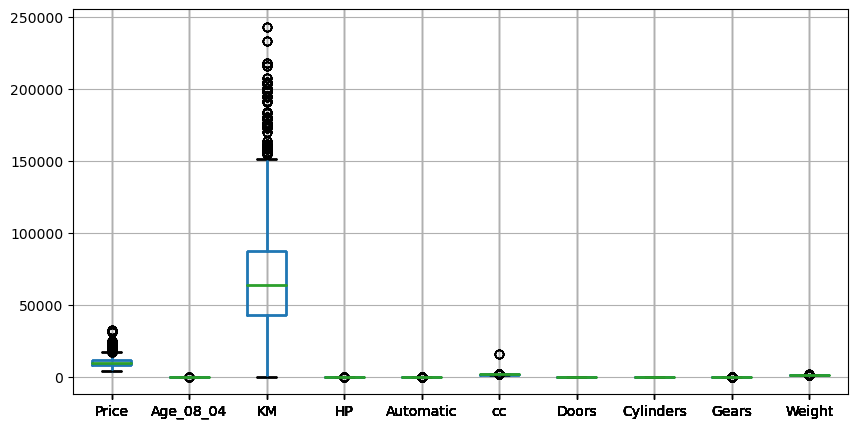

In [20]:
## we can draw boxplot to check for the outliers
for i in num_col:
    data.boxplot(column=num_col,figsize=(10,5))
plt.show()

In [21]:
## Boxplot shows presence of outliers in multiple columns

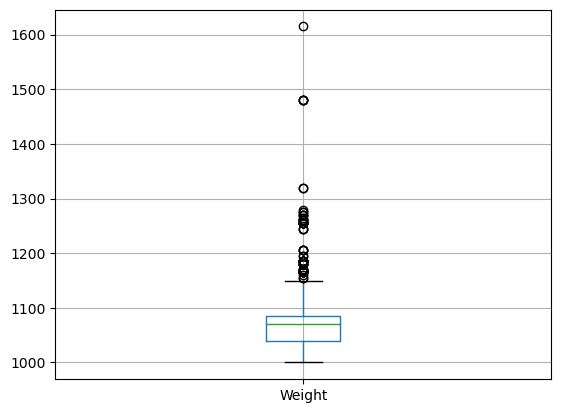

In [22]:
data.boxplot('Weight')   ## checking one by one shows maximum outliers in KM, Price, Age_08_04 and Weight columns
plt.show()

In [23]:
## removing outliers using define function
import scipy.stats as stats
def remove_outliers(df,column):
    Q3= data[column].quantile(0.75)
    Q1= data[column].quantile(0.25)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    Upper_extreme= Q3+1.5*IQR
    return data[(data[column]>lower_extreme) & (data[column]<Upper_extreme)]

In [24]:
df1=remove_outliers(data,'KM')

In [25]:
df2=remove_outliers(df1,'Age_08_04')

In [26]:
df3=remove_outliers(df2,'Price')

In [27]:
df_new=remove_outliers(df3,'Weight')

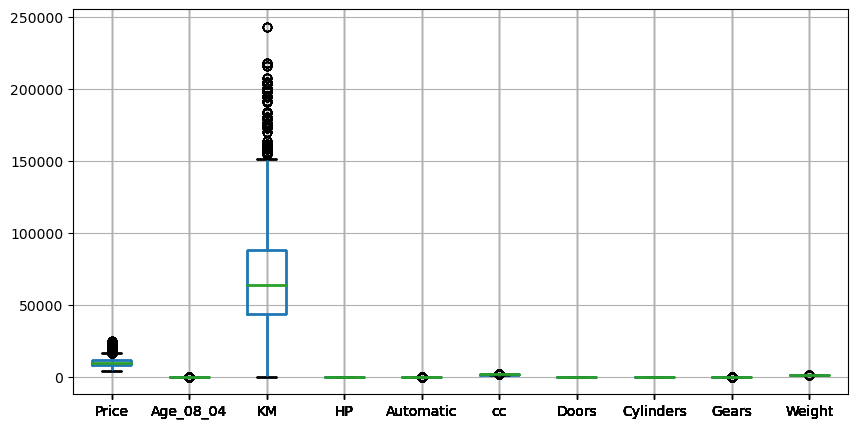

In [28]:
for i in num_col:
    df_new.boxplot(column=num_col,figsize=(10,5))
plt.show()

In [29]:
## EDA Step 4 - correlation check using heatmap

In [30]:
corr=df_new[num_col].corr()

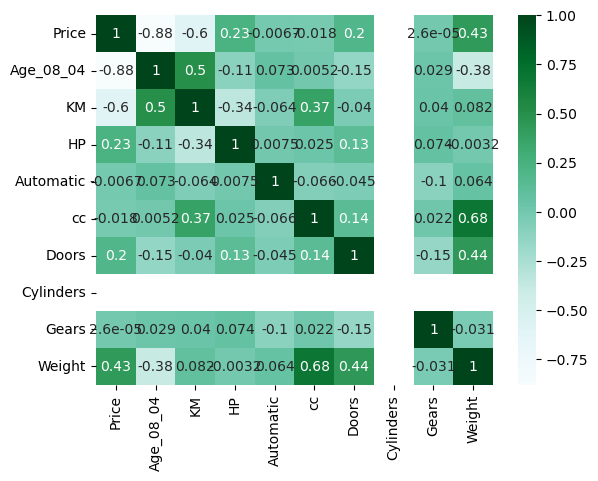

In [31]:
sns.heatmap(df_new[num_col].corr(),annot=True,cmap='BuGn')
plt.show()

In [32]:
## We will try to check the correlation of each feature with our target column

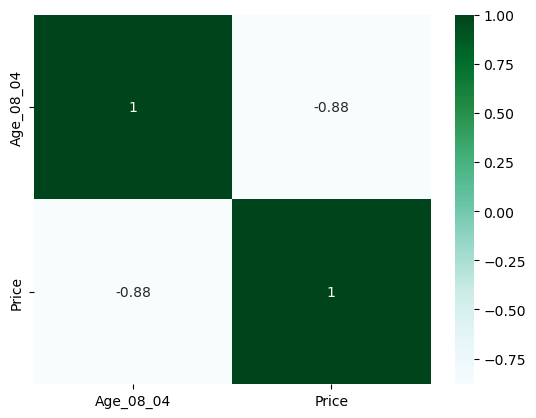

In [33]:
sns.heatmap(df_new[['Age_08_04','Price']].corr(),annot=True,cmap='BuGn')
plt.show()

In [34]:
## There is a strong negative correlation between Age and Price hence Age cannot be ignored

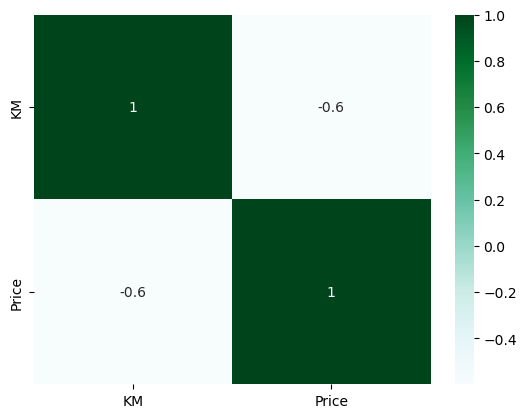

In [35]:
sns.heatmap(df_new[['KM','Price']].corr(),annot=True,cmap='BuGn')
plt.show()

In [36]:
## There is a strong negative correlation between KM and Price hence cannot be ignored

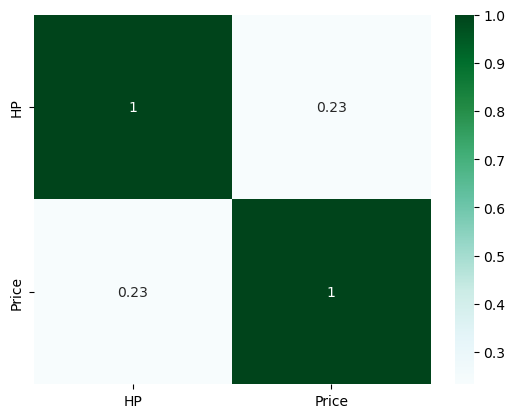

In [37]:
sns.heatmap(df_new[['HP','Price']].corr(),annot=True,cmap='BuGn')
plt.show()

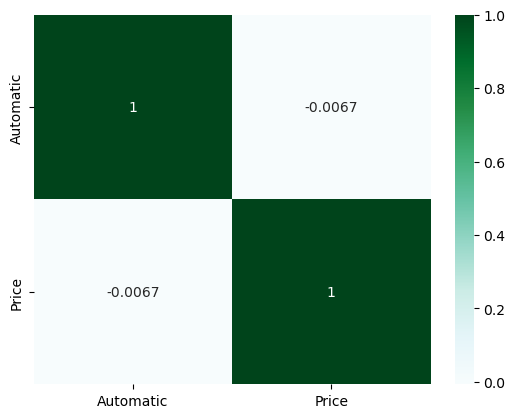

In [38]:
sns.heatmap(df_new[['Automatic','Price']].corr(),annot=True,cmap='BuGn')
plt.show()

In [39]:
## shows extremely low correltion hence Automatic feature can be ignored before passing the data to ML algorithm

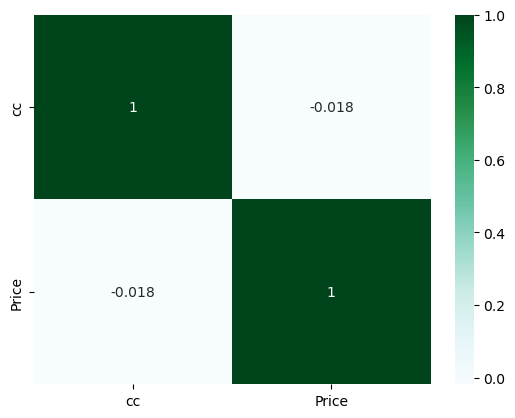

In [40]:
sns.heatmap(df_new[['cc','Price']].corr(),annot=True,cmap='BuGn')
plt.show()

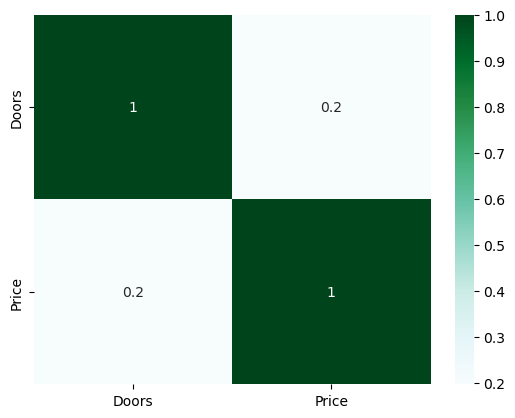

In [41]:
sns.heatmap(df_new[['Doors','Price']].corr(),annot=True,cmap='BuGn')
plt.show()

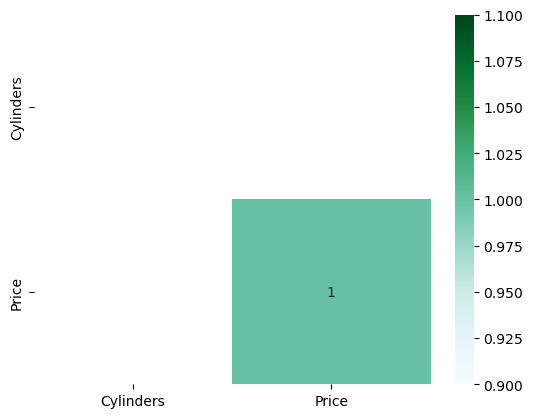

In [42]:
sns.heatmap(df_new[['Cylinders','Price']].corr(),annot=True,cmap='BuGn')
plt.show()

In [43]:
## There is no correlation between Cylinders and Price hence this feature is irrelevant

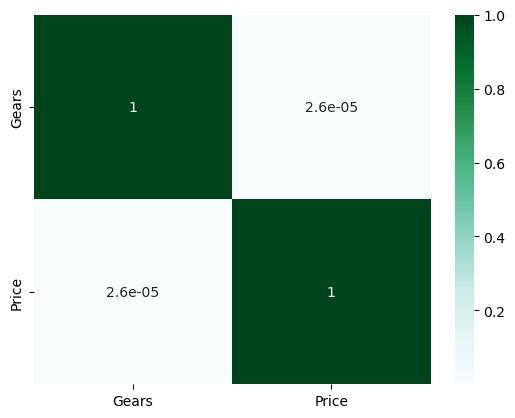

In [44]:
sns.heatmap(df_new[['Gears','Price']].corr(),annot=True,cmap='BuGn')
plt.show()

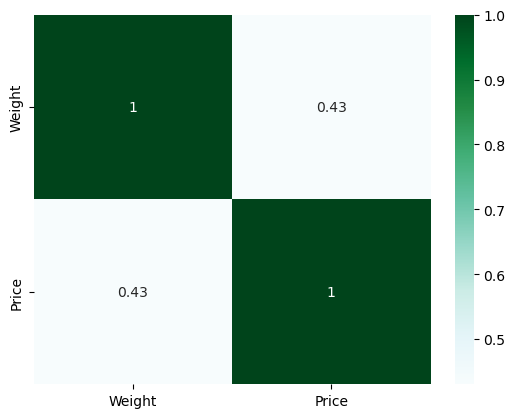

In [45]:
sns.heatmap(df_new[['Weight','Price']].corr(),annot=True,cmap='BuGn')
plt.show()

In [46]:
## Final conclusion from heatmap is the following features can be ignored - Gears, Cylinders, cc, and Automatic

In [47]:
df_new.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.0,1370.000000,1370.000000
mean,10361.794891,57.357664,69250.283942,100.930657,0.051825,1551.021898,4.029927,4.0,5.022628,1064.536496
std,3073.221752,17.595876,37046.350835,12.781195,0.221754,173.119696,0.950865,0.0,0.179884,33.761340
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8250.000000,48.000000,43705.000000,86.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1035.000000
50%,9750.000000,61.500000,64000.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1065.000000
75%,11500.000000,71.000000,87955.250000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1080.000000
max,24500.000000,80.000000,243000.000000,116.000000,1.000000,2000.000000,5.000000,4.0,6.000000,1150.000000


In [48]:
## Above data shows after performing EDA, there is not much difference in mean and median

In [49]:
df_new.shape  ## after pereforming EDA we are left with 1370 rows as compared with 1436 in the original dataset

(1370, 11)

In [50]:
## EDA Step 5 - Feature Engineering (converting categorical columns to numerical and standard scaling)

In [51]:
## Fuel_Type is the only categorical column

In [52]:
df_new['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [53]:
## This belongs to ordinal data type hence we will apply Ordinal Encoder
## Also we will apply standard scaler to standardize all the columns

In [54]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

In [55]:
std_sca=StandardScaler()
ord_enc=OrdinalEncoder()

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
## we perform ordinal encoder to Fuel_Type column since this is the only categorical column

In [58]:
df_new['Fuel_Type']=ord_enc.fit_transform(df_new[['Fuel_Type']])

In [59]:
## First we need to split target and features

In [60]:
target=df_new[['Price']]
features=df_new.drop('Price',axis=1)

In [61]:
target

,Price
9,12950
17,17950
18,16750
19,16950
20,15950
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [62]:
features

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
9,23,71138,1.0,69,0,1900,3,4,5,1105
17,24,21716,2.0,110,0,1600,3,4,5,1105
18,24,25563,2.0,110,0,1600,3,4,5,1065
19,30,64359,2.0,110,0,1600,3,4,5,1105
20,30,67660,2.0,110,0,1600,3,4,5,1105
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,2.0,86,0,1300,3,4,5,1025
1432,72,19000,2.0,86,0,1300,3,4,5,1015
1433,71,17016,2.0,86,0,1300,3,4,5,1015
1434,70,16916,2.0,86,0,1300,3,4,5,1015


In [63]:
features=std_sca.fit_transform(features)

In [64]:
features  ## we see that all the numerical columns have been standardized

array([[-1.95331053,  0.05097413, -2.58710135, ...,  0.        ,
        -0.12583652,  1.19895357],
       [-1.89645828, -1.28357154,  0.30622832, ...,  0.        ,
        -0.12583652,  1.19895357],
       [-1.89645828, -1.17969074,  0.30622832, ...,  0.        ,
        -0.12583652,  0.01373384],
       ...,
       [ 0.77559749, -1.41048597,  0.30622832, ...,  0.        ,
        -0.12583652, -1.46779081],
       [ 0.71874524, -1.41318627,  0.30622832, ...,  0.        ,
        -0.12583652, -1.46779081],
       [ 1.05985874, -1.86994318,  0.30622832, ...,  0.        ,
        -0.12583652,  1.465628  ]])

In [65]:
## After applying standard scaler and ordinal encoder, our features and target is ready to be passed to ML algorithm

# Model building

## Model 1

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [67]:
## train test split (80% training and 20% testing)
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [68]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1096, 10)
(1096, 1)
(274, 10)
(274, 1)


In [69]:
## we have 1096 rows with 10 features for training and 274 rows for testing

In [70]:
model1=LinearRegression()  ## defining linear regression model

In [71]:
model1.fit(x_train,y_train)  ## training the model1

LinearRegression()

In [72]:
y_pred1=model1.predict(x_test)  ## predicting target values corresponding to x_test data

In [73]:
r2_score(y_test,y_pred1)  ## checking the r2 score for accuracy

0.8282631220218367

In [74]:
## Model1 gives an accuracy of 82.8 percent

In [75]:
## coefficients
model1.coef_

array([[-2.01557260e+03, -5.57886027e+02,  3.03923826e+02,
         1.73381967e+02, -2.44518091e+01, -3.59667345e+02,
        -1.43089258e+02,  2.84217094e-14,  7.13087644e+01,
         1.08286452e+03]])

In [76]:
## intercept
model1.intercept_

array([10380.78676686])

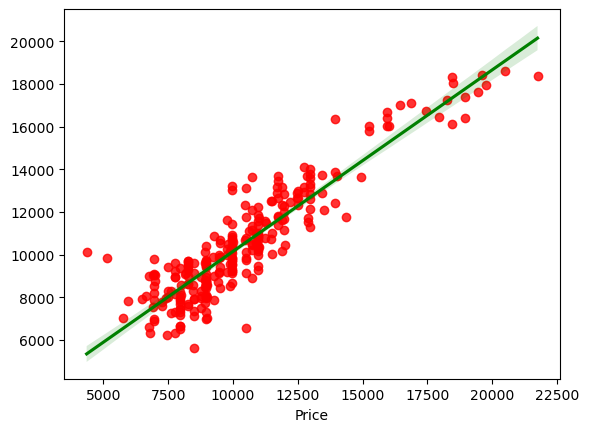

In [77]:
## visualization - green line is the best fit line given by model1 and red points are the actual target testing data
sns.regplot(data=df_new,x=y_test,y=y_pred1,scatter_kws={'color':'red'},line_kws={'color':'green'})
plt.show();

In [78]:
## Apply Lasso

In [79]:
from sklearn.linear_model import Lasso

In [80]:
lasso=Lasso(alpha=5)  ## alpha is hyperparameter

In [81]:
lasso.fit(x_train,y_train)

Lasso(alpha=5)

In [82]:
y_pred1=lasso.predict(x_test)

In [83]:
r2_score(y_test,y_pred1)

0.8281207704457354

In [84]:
from sklearn.model_selection import GridSearchCV  ## we try using grid search to find the best alpha value

In [85]:
var=range(1,100)

In [86]:
params=dict(alpha=var)

In [87]:
grid_search=GridSearchCV(lasso,params)

In [88]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(alpha=5), param_grid={'alpha': range(1, 100)})

In [89]:
grid_search.best_params_  ## best alpha value is 3

{'alpha': 3}

In [90]:
lasso=Lasso(alpha=3)

In [91]:
lasso.fit(x_train,y_train)

Lasso(alpha=3)

In [92]:
y_pred1=lasso.predict(x_test)

In [93]:
r2_score(y_test,y_pred1)

0.8281869389835301

In [94]:
## Even after applying Lasso accuracy remains 82.8 percent

In [95]:
## Apply Ridge

In [96]:
from sklearn.linear_model import Ridge

In [97]:
ridge=Ridge(alpha=3)  ## any arbitrary value for alpha

In [98]:
ridge.fit(x_train,y_train)

Ridge(alpha=3)

In [99]:
y_pred1=ridge.predict(x_test)

In [100]:
r2_score(y_test,y_pred1)

0.8284273141925016

In [101]:
grid_search1=GridSearchCV(ridge,params)  ## applying grid search to find best alpha value

In [102]:
grid_search1.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(alpha=3), param_grid={'alpha': range(1, 100)})

In [103]:
grid_search.best_params_  ## best aplha value is 3

{'alpha': 3}

In [104]:
ridge=Ridge(alpha=3)

In [105]:
ridge.fit(x_train,y_train)

Ridge(alpha=3)

In [106]:
y_pred1=ridge.predict(x_test)

In [107]:
r2_score(y_test,y_pred1)

0.8284273141925016

In [108]:
## Even after applying Ridge accuracy remains 82.8 percent

## Model 2

In [109]:
## We will try to drop the irrelevant features and build the model

In [110]:
df_new1=df_new.drop(['Gears','Cylinders','cc','Automatic'],axis=1)

In [111]:
df_new1

,Price,Age_08_04,KM,Fuel_Type,HP,Doors,Weight
9,12950,23,71138,1.0,69,3,1105
17,17950,24,21716,2.0,110,3,1105
18,16750,24,25563,2.0,110,3,1065
19,16950,30,64359,2.0,110,3,1105
20,15950,30,67660,2.0,110,3,1105
...,...,...,...,...,...,...,...
1431,7500,69,20544,2.0,86,3,1025
1432,10845,72,19000,2.0,86,3,1015
1433,8500,71,17016,2.0,86,3,1015
1434,7250,70,16916,2.0,86,3,1015


In [112]:
features1=df_new1.drop('Price',axis=1)
target1=df_new1[['Price']]

In [113]:
features1

,Age_08_04,KM,Fuel_Type,HP,Doors,Weight
9,23,71138,1.0,69,3,1105
17,24,21716,2.0,110,3,1105
18,24,25563,2.0,110,3,1065
19,30,64359,2.0,110,3,1105
20,30,67660,2.0,110,3,1105
...,...,...,...,...,...,...
1431,69,20544,2.0,86,3,1025
1432,72,19000,2.0,86,3,1015
1433,71,17016,2.0,86,3,1015
1434,70,16916,2.0,86,3,1015


In [114]:
target1

,Price
9,12950
17,17950
18,16750
19,16950
20,15950
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [115]:
## Apply standard scaler to features

In [116]:
features1=std_sca.fit_transform(features1)

In [117]:
features1

array([[-1.95331053,  0.05097413, -2.58710135, -2.49916504, -1.08354319,
         1.19895357],
       [-1.89645828, -1.28357154,  0.30622832,  0.709844  , -1.08354319,
         1.19895357],
       [-1.89645828, -1.17969074,  0.30622832,  0.709844  , -1.08354319,
         0.01373384],
       ...,
       [ 0.77559749, -1.41048597,  0.30622832, -1.16860032, -1.08354319,
        -1.46779081],
       [ 0.71874524, -1.41318627,  0.30622832, -1.16860032, -1.08354319,
        -1.46779081],
       [ 1.05985874, -1.86994318,  0.30622832,  0.709844  ,  1.02057329,
         1.465628  ]])

In [118]:
x_train,x_test,y_train,y_test=train_test_split(features1,target1,train_size=0.8,random_state=200)

In [119]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1096, 6)
(274, 6)
(1096, 1)
(274, 1)


In [120]:
## now we have 1096 rows with 6 features for training and 274 rows for testing 

In [121]:
model2=LinearRegression()

In [122]:
model2.fit(x_train,y_train)

LinearRegression()

In [123]:
y_pred2=model2.predict(x_test)

In [124]:
r2_score(y_test,y_pred2)

0.8339618263029548

In [125]:
## we see that the accuracy score has slightly improved to 83.4 percent

In [126]:
ridge.fit(x_train,y_train)

Ridge(alpha=3)

In [127]:
y_pred2_r=ridge.predict(x_test)

In [128]:
r2_score(y_test,y_pred2_r)

0.8337885812871861

In [129]:
## After applying Ridge we see that the accuracy score is still 83.4 percent

## Model 3

In [130]:
## We will try to change the training size

In [131]:
x_train,x_test,y_train,y_test=train_test_split(features1,target1,train_size=0.7,random_state=200)

In [132]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(958, 6)
(412, 6)
(958, 1)
(412, 1)


In [133]:
## now the training size is reduced to 958 rows and testing increased to 412 rows

In [134]:
model3=LinearRegression()

In [135]:
model3.fit(x_train,y_train)

LinearRegression()

In [136]:
y_pred3=model3.predict(x_test)

In [137]:
r2_score(y_test,y_pred3)

0.8403636541245298

In [138]:
## Accuract has slightly improved to 84 percent

In [139]:
ridge.fit(x_train,y_train)

Ridge(alpha=3)

In [140]:
y_pred3=ridge.predict(x_test)

In [141]:
r2_score(y_test,y_pred3)

0.8402904878521483

# Conclusion

In [142]:
## Model 3 without applying Ridge or Lasso is so far the best model with training size 70%, testing size 30% and df_new1 dataset

In [143]:
model_final=LinearRegression()

In [144]:
model_final.fit(x_train,y_train)

LinearRegression()

In [145]:
y_predict=model_final.predict(x_test)

In [146]:
r2_score(y_test,y_predict)

0.8403636541245298

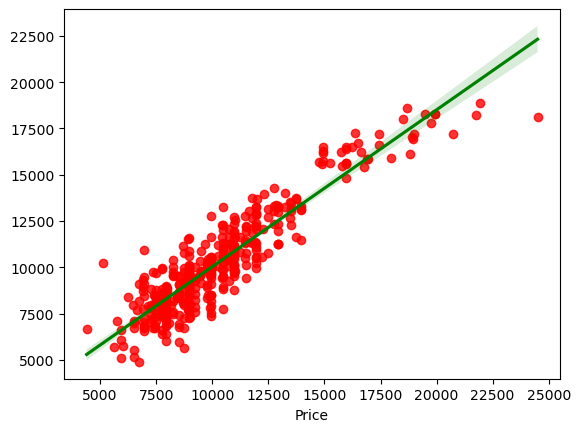

In [147]:
## visualization - green line is the best fit line given by model1 and red points are the actual target testing data
sns.regplot(data=df_new1,x=y_test,y=y_predict,scatter_kws={'color':'red'},line_kws={'color':'green'})
plt.show();

In [148]:
## Coefficients
model_final.coef_

array([[-1998.18178082,  -707.73284276,   383.07799385,    69.4855441 ,
          -87.23747423,   874.59459726]])

In [149]:
## Intercept
model_final.intercept_

array([10361.06157535])

# Interview Questions

#### What is Normalization & Standardization and how is it helpful

In [151]:
## Normalization or Standardization is one of the most important data preprocessing step in machine learning.
## Machine Learning Algorithms are biased towards numerically larger values if the data is not scaled.
## If proper scaling is not done, algorithms may not give good accuracy

In [152]:
## Normalization also called Min-Max Scaling is used to transform features to be on a similar scale.
## The new point is calculated as x_new = (x - x_min)/(x_max - x_min) . This scales the range to [0, 1]
## Normalization is useful when there are no outliers, when we don’t know about the distribution of data

In [154]:
## Standardization also called Z-Score Normalization is the transformation of features by subtracting from mean
## and dividing by standard deviation. The new point is calculated as x_new = (x - mean)/sd  (sd is standard deviation) .
## Standardization does not get affected by outliers because there is no predefined range of transformed features.
## It is useful when the feature distribution is Normal (but not necessary).

#### What techniques can be used to address multicollinearity in multiple linear regression

In [155]:
## Multicollinearity is a phenomenon that occurs when two or more independent variables in a regression model are highly
## correlated making it difficult to accurately determine the individual effects of each independent variable on the dependent
## variable. If x1 increases it will result in increase in y but at the same time it will also affect x2.
## To address multicollinearity in multiple linear regression we have two approach
## 1. Using Lasso or Ridge we can eliminate some highly correlated features which provide repeated information.
## 2. Using PCA we can combine some highly correlated features into a single feature containing extract of repeated features.
## PCA is Principal Component Analysis.